In [ ]:
!pip install rasterio
!pip install spectral

     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 212 kB 5.1 MB/s 


In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import reshape_as_raster

In [ ]:
# Coeficientes
coeffs = np.array([(0.3561, 0.3972, 0.3904, 0.6966, 0.2286, 0.1596), 
          (-0.3344, -0.3544, -0.4556, 0.6966, -0.0242, -0.2630),
          (0.2626, 0.2141, 0.0926, 0.0656, -0.7629, -0.5388),
          (0.0805, -0.0498, 0.1950, -0.1327, 0.5752, -0.7775)])


In [ ]:
coeffs.shape

(4, 6)

In [ ]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)
b4 = src.read(4)
b5 = src.read(5)
b7 = src.read(6)
meta = src.profile
img = np.dstack([b1,b2,b3,b4,b5,b7])

In [ ]:
# Modificando shape da imagem de entrada
img1 = img.reshape(img.shape[0] * img.shape[1], img.shape[2]).swapaxes(0,1)

In [ ]:
img1.shape

(6, 1874160)

In [ ]:
# Calculando tasseled cap
tc = np.dot(coeffs, img1)

In [ ]:
tc.shape

(4, 1874160)

In [ ]:
# Voltando resultado para o shape da imagem original
tc_reshape = tc.swapaxes(0,1).reshape(img.shape[0], img.shape[1], 4)

In [ ]:
tc_reshape.shape

(1233, 1520, 4)

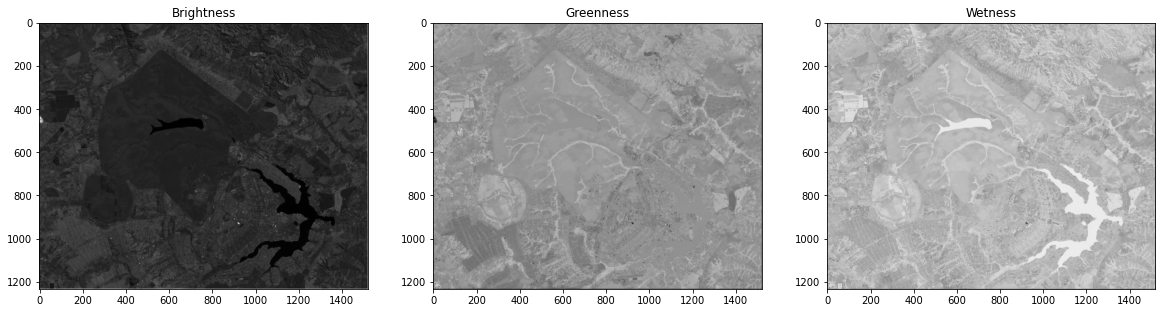

In [ ]:
# Visualizando imagens
fig,ax = plt.subplots(1,3,figsize=(20,6))

ax[0].imshow(tc_reshape[:,:,0], cmap='gray')
ax[0].set_title('Brightness')
ax[1].imshow(tc_reshape[:,:,1], cmap='gray')
ax[1].set_title('Greenness')
ax[2].imshow(tc_reshape[:,:,2], cmap='gray')
ax[2].set_title('Wetness')
plt.show()

In [ ]:
tc_reshape = tc_reshape + c

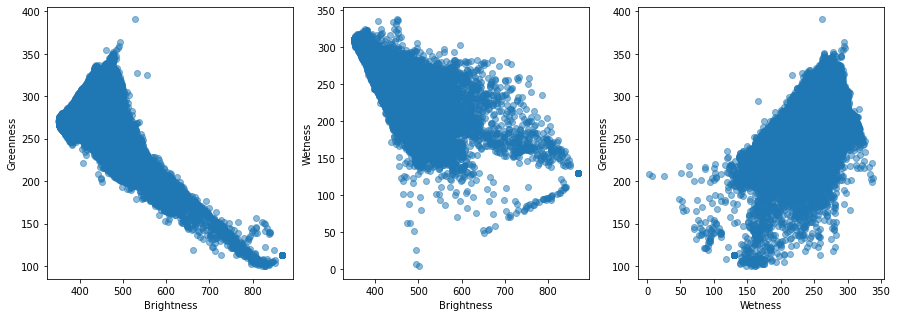

In [ ]:
# Visualizando scatterplots


fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(tc_reshape[:,:,0], tc_reshape[:,:,1], alpha = 0.5)
ax[0].set_xlabel('Brightness')
ax[0].set_ylabel('Greenness')

ax[1].scatter(tc_reshape[:,:,0], tc_reshape[:,:,2], alpha = 0.5)
ax[1].set_xlabel('Brightness')
ax[1].set_ylabel('Wetness')

ax[2].scatter(tc_reshape[:,:,2], tc_reshape[:,:,1], alpha = 0.5)
ax[2].set_xlabel('Wetness')
ax[2].set_ylabel('Greenness')

plt.show()

In [ ]:
meta.update(count = tc_reshape.shape[2])

In [ ]:
tc_save = reshape_as_raster(tc_reshape)

In [ ]:
with rio.open('tc.tif','w', **meta) as save:
  save.write(tc_save)

In [ ]:
brightness = (0.3561 * b1) + (0.3972 * b2) + (0.3904 * b3) + (0.6966 * b4) + (0.2286 * b5) + (0.1596 * b7)
greenness = (-0.3344 * b1) + (-0.3544 * b2) + (-0.4556 * b3) + (0.6966 * b4) + (-0.0242 * b5) + (-0.263 * b7)
wetness = (0.2626 * b1) + (0.2141 * b2) + (0.0926 * b3) + (0.0656 * b4) + (-0.7629 * b5) + (-0.5388 * b7)

In [ ]:
greenness.shape

(1233, 1520)

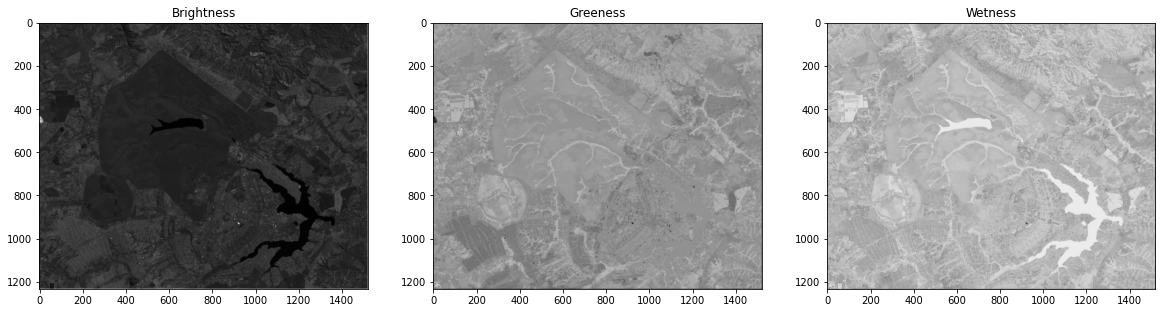

In [ ]:
# Visualizando imagens
fig,ax = plt.subplots(1,3,figsize=(20,6))

ax[0].imshow(brightness, cmap='gray')
ax[0].set_title('Brightness')
ax[1].imshow(greenness, cmap='gray')
ax[1].set_title('Greenness')
ax[2].imshow(wetness, cmap='gray')
ax[2].set_title('Wetness')
plt.show()